# Basics of cluster analysis

## Import the relevant libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans

## Load the data

In [4]:
data = pd.read_csv('3.01. Country clusters.csv')

In [5]:
data

Country  Latitude  Longitude Language
0        USA     44.97    -103.77  English
1     Canada     62.40     -96.80  English
2     France     46.75       2.40   French
3         UK     54.01      -2.53  English
4    Germany     51.15      10.40   German
5  Australia    -25.45     133.11  English

## Plot the data

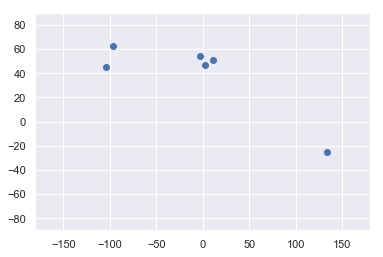

In [6]:
plt.scatter(data['Longitude'], data['Latitude'])
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

## Select the features

In [7]:
x = data.iloc[:, 1:3]


In [8]:
x

Latitude  Longitude
0     44.97    -103.77
1     62.40     -96.80
2     46.75       2.40
3     54.01      -2.53
4     51.15      10.40
5    -25.45     133.11

## Clustering

In [23]:
kmeans = KMeans(2)

In [24]:
kmeans.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

## Clustering results

In [25]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 0, 1])

In [26]:
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters

In [27]:
data_with_clusters

Country  Latitude  Longitude Language  Cluster
0        USA     44.97    -103.77  English        0
1     Canada     62.40     -96.80  English        0
2     France     46.75       2.40   French        0
3         UK     54.01      -2.53  English        0
4    Germany     51.15      10.40   German        0
5  Australia    -25.45     133.11  English        1

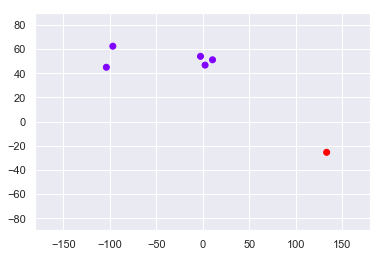

In [28]:
plt.scatter(data_with_clusters['Longitude'], data_with_clusters['Latitude'], c=data_with_clusters['Cluster'], cmap='rainbow')
plt.xlim(-180,180)
plt.ylim(-90,90)
plt.show()

In [29]:
kmeans.inertia_

13205.758119999999

In [31]:
WCSS = []

for i in range(1,7):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    WCSS.append(wcss_iter)

In [32]:
WCSS

[42601.91356666667,
 13205.758119999999,
 288.1052333333333,
 111.91233333333332,
 38.50624999999998,
 0.0]

## The Elbow Method

Text(0, 0.5, 'Within-Clusters Sum of Squares')

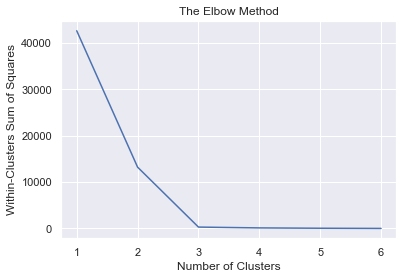

In [34]:
number_clusters = range(1,7)
plt.plot(number_clusters, WCSS)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Clusters Sum of Squares')